In [1]:
# link: https://scikit-learn.org/stable/modules/neural_networks_supervised.html
# Deep Learning Classification: Class MLPClassifier implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation.
# visualizing Math: http://al-roomi.org/3DPlot/index.html

# Intellisense
# after (.) press tab to show intellisense
%config IPCompleter.greedy=True

from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance
import shap #for SHAP values
from pdpbox import pdp, info_plots #for partial plots
from sklearn import metrics
np.random.seed(123) #ensure reproducibility

pd.options.mode.chained_assignment = None  #hide any pandas warnings

In [2]:
# help taken from: https://www.kaggle.com/sulianova/eda-cardiovascular-data
df = pd.read_csv('dataset/heart_failure_detection_kaggle.csv', encoding = 'ISO-8859-1')

In [3]:
# display first few records
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [5]:
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'

df['chest_pain_type'][df['chest_pain_type'] == 1] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'non-anginal pain'
df['chest_pain_type'][df['chest_pain_type'] == 4] = 'asymptomatic'

df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

df['rest_ecg'][df['rest_ecg'] == 0] = 'normal'
df['rest_ecg'][df['rest_ecg'] == 1] = 'ST-T wave abnormality'
df['rest_ecg'][df['rest_ecg'] == 2] = 'left ventricular hypertrophy'

df['exercise_induced_angina'][df['exercise_induced_angina'] == 0] = 'no'
df['exercise_induced_angina'][df['exercise_induced_angina'] == 1] = 'yes'

df['st_slope'][df['st_slope'] == 1] = 'upsloping'
df['st_slope'][df['st_slope'] == 2] = 'flat'
df['st_slope'][df['st_slope'] == 3] = 'downsloping'

df['thalassemia'][df['thalassemia'] == 1] = 'normal'
df['thalassemia'][df['thalassemia'] == 2] = 'fixed defect'
df['thalassemia'][df['thalassemia'] == 3] = 'reversable defect'

In [6]:
df['sex'] = df['sex'].astype('object')
df['chest_pain_type'] = df['chest_pain_type'].astype('object')
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].astype('object')
df['rest_ecg'] = df['rest_ecg'].astype('object')
df['exercise_induced_angina'] = df['exercise_induced_angina'].astype('object')
df['st_slope'] = df['st_slope'].astype('object')
df['thalassemia'] = df['thalassemia'].astype('object')

In [7]:
# create dummy values for categorical values and drop the first category
df= pd.get_dummies(df, drop_first=True)

In [8]:
# Training Deep Learning Model
# =============================================================
# Split data into training and testing
X=df.drop('target', 1)
Y=df['target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .2, random_state=10) #split the data

In [9]:
# Training the Multi-layer Perceptron ( Deep Learning Algorithm)
# =====================================================================
# Def. Class MLPClassifier implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation.
# Capability #1: MLP can fit a non-linear model to the training data. 
# Capability #2: MLP can learn models in real-time (on-line learning) using partial_fit.
# MLP trains using Stochastic Gradient Descent, Adam, or L-BFGS. 
# Stochastic Gradient Descent (SGD) updates parameters using the gradient of the loss function with respect to a parameter that needs adaptation

In [10]:
# Initialization
mlp_dl = MLPClassifier(activation='relu', solver='sgd', random_state=1)

In [11]:
mlp_dl.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [12]:
mlp_dl.predict(X_test)

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [13]:
print("score on training data")
mlp_dl.score(X_train, y_train)

score on training data


0.71900826446281

In [14]:
print("score on test data")
mlp_dl.score(X_test, y_test)

score on test data


0.6557377049180327

In [16]:
# Weight Matrices
#print("weight matrices")
#[coef.shape for coef in mlp_dl.coefs_]

In [17]:
# Hyperparameter Tuning for MLP
# ===============================================
mlp_dl = MLPClassifier(activation='tanh', solver='sgd', random_state=1)
mlp_dl.fit(X_train, y_train)

print("score on test data")
mlp_dl.score(X_test, y_test)

score on test data


0.6721311475409836

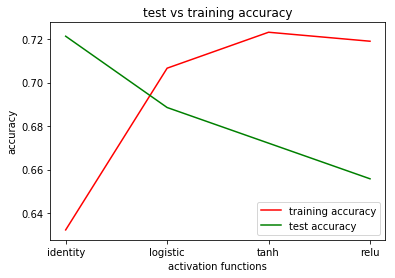

In [18]:
act_fns = ['identity', 'logistic', 'tanh', 'relu']
sol_fns = ['lbfgs', 'sgd', 'adam']

te_score=[]
tr_score=[]
for act_fn in act_fns:
    mlp_dl = MLPClassifier(activation=act_fn, solver='sgd', random_state=1)
    mlp_dl.fit(X_train, y_train)
    tr_score.append(mlp_dl.score(X_train, y_train))
    te_score.append(mlp_dl.score(X_test, y_test))
    
plt.plot(act_fns, tr_score, 'r', label='training accuracy')
plt.plot(act_fns, te_score, 'g', label='test accuracy')
plt.title("test vs training accuracy")
plt.xlabel("activation functions")
plt.ylabel("accuracy")
plt.legend()
plt.show()


In [19]:
from mpl_toolkits import mplot3d

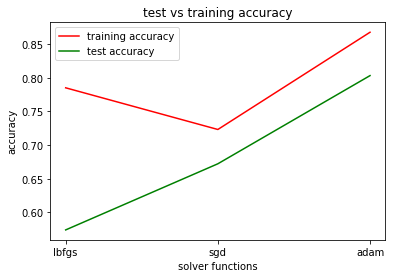

In [20]:
# Tuning Solver parameters
sol_fns = ['lbfgs', 'sgd', 'adam']

te_score=[]
tr_score=[]
for sol_fn in sol_fns:
    mlp_dl = MLPClassifier(activation='tanh', solver=sol_fn, random_state=1)
    mlp_dl.fit(X_train, y_train)
    tr_score.append(mlp_dl.score(X_train, y_train))
    te_score.append(mlp_dl.score(X_test, y_test))
    
plt.plot(sol_fns, tr_score, 'r', label='training accuracy')
plt.plot(sol_fns, te_score, 'g', label='test accuracy')
plt.title("test vs training accuracy")
plt.xlabel("solver functions")
plt.ylabel("accuracy")
plt.legend()
plt.show()


In [21]:
# tunining number of hidden layers and hidden neurons at each layer
mlp_dl = MLPClassifier(activation='tanh', solver='sgd',  hidden_layer_sizes=(1000,), random_state=1)
mlp_dl.fit(X_train, y_train)

print("score on test data")
mlp_dl.score(X_test, y_test)

score on test data


0.6229508196721312

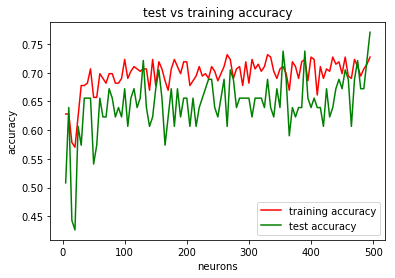

In [22]:
h_neurons = np.arange(5,500,5)
# Hyper Paramerter Tuning for Random Forest
# 1. n_estimators
# Def. n_estimators represents the number of trees in the forest

tr_score=[]
te_score=[]
for h_neuron in h_neurons:
    mlp_dl = MLPClassifier(activation='tanh', solver='sgd', hidden_layer_sizes=(h_neuron), random_state=1)
    mlp_dl.fit(X_train, y_train)
    tr_score.append(mlp_dl.score(X_train, y_train))
    te_score.append(mlp_dl.score(X_test, y_test))
    
plt.plot(h_neurons, tr_score, 'r', label='training accuracy')
plt.plot(h_neurons, te_score, 'g', label='test accuracy')
plt.title("test vs training accuracy")
plt.xlabel("neurons")
plt.ylabel("accuracy")
plt.legend()
plt.show()


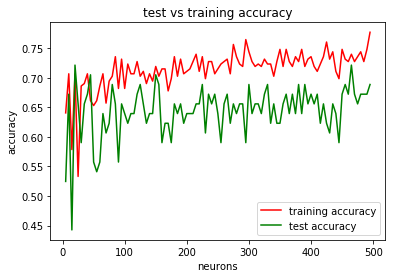

In [23]:
# max_iteration and n_iter_no_change
h_neurons = np.arange(5,500,5)
# Hyper Paramerter Tuning for Random Forest
# 1. n_estimators
# Def. n_estimators represents the number of trees in the forest

tr_score=[]
te_score=[]
for h_neuron in h_neurons:
    mlp_dl = MLPClassifier(activation='tanh', solver='sgd', hidden_layer_sizes=(h_neuron), max_iter=500, n_iter_no_change=50, random_state=1)
    mlp_dl.fit(X_train, y_train)
    tr_score.append(mlp_dl.score(X_train, y_train))
    te_score.append(mlp_dl.score(X_test, y_test))
    
plt.plot(h_neurons, tr_score, 'r', label='training accuracy')
plt.plot(h_neurons, te_score, 'g', label='test accuracy')
plt.title("test vs training accuracy")
plt.xlabel("neurons")
plt.ylabel("accuracy")
plt.legend()
plt.show()


In [26]:
# overfitting and underfitting the model
# change neurons, max_iter and n_iter_no_change

mlp_dl = MLPClassifier(activation='tanh', solver='sgd', hidden_layer_sizes=(500,), max_iter=5000, 
                       n_iter_no_change=500, learning_rate='adaptive', random_state=1)
mlp_dl.fit(X_train, y_train)

print("training accuracy")
print(mlp_dl.score(X_train, y_train))

print("testing accuracy")
print(mlp_dl.score(X_test, y_test))
    

training accuracy
0.8099173553719008
testing accuracy
0.6229508196721312
